# Importing Important Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#view without calling. A nice little shortcut
%matplotlib inline

In [3]:
#as always, we need a pathway to the data
path=r'C:\Users\evras\Desktop\Project A6\01 Data'

In [4]:
#we're bringing in the version with states attatched just because it's the most recent version of the file
df_bnb=pd.read_pickle(os.path.join(path,'02 Altered','us_airbnb_2_states.pkl'))

In [50]:
df_bnb.shape

(226000, 17)

In [51]:
df_bnb.head()

,listing_id,listing_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,city,state,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,host_listing_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,None,28804,35.65146,-82.62792,Asheville,North Carolina,Private room,60,1,138,16/02/20,1.14,1,0
1,80905,French Chic Loft,427027,None,28801,35.59779,-82.55540,Asheville,North Carolina,Entire home/apt,470,1,114,7/9/2020,1.03,11,288
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,None,28801,35.60670,-82.55563,Asheville,North Carolina,Entire home/apt,75,30,89,30/11/19,0.81,2,298
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,None,28806,35.57864,-82.59578,Asheville,North Carolina,Entire home/apt,90,1,267,22/09/20,2.39,5,0
4,160594,Historic Grove Park,769252,None,28801,35.61442,-82.54127,Asheville,North Carolina,Private room,125,30,58,19/10/15,0.52,1,0


In [52]:
df_bnb.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listing_count,availability_365
count,226000.000000,226000.000000,226000.000000,226000.000000,226000.000000,226000.000000,226000.000000,226000.000000
mean,35.662211,-103.223271,219.720097,10.126389,34.510748,1.123784,16.700611,159.325208
std,6.849969,26.222200,570.387886,25.166666,63.606045,1.603133,51.072045,140.177433
min,18.920990,-159.714900,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,32.761760,-118.598353,75.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,37.259800,-97.817995,121.000000,2.000000,8.000000,0.420000,2.000000,140.000000
75%,40.724030,-76.922865,201.000000,7.000000,39.000000,1.620000,6.000000,311.000000
max,47.734620,-70.995950,24999.000000,1250.000000,966.000000,44.060000,593.000000,365.000000


# Cleaning

In [5]:
#should be fine here, but just in case we'll do the usual bits.
df_bnb.isnull().sum()

listing_id                        0
listing_name                      0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
city                              0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
state                             0
dtype: int64

In [7]:
#a thing of beauty.
#next up...
df_bnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226000 entries, 0 to 226028
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   listing_id                      226000 non-null  object 
 1   listing_name                    226000 non-null  object 
 2   host_id                         226000 non-null  object 
 3   neighbourhood_group             226000 non-null  object 
 4   neighbourhood                   226000 non-null  object 
 5   latitude                        226000 non-null  float64
 6   longitude                       226000 non-null  float64
 7   city                            226000 non-null  object 
 8   room_type                       226000 non-null  object 
 9   price                           226000 non-null  int64  
 10  minimum_nights                  226000 non-null  int64  
 11  number_of_reviews               226000 non-null  int64  
 12  last_review     

In [8]:
#oh right, let's move state and then move onto the analysis.
df_bnb.columns

Index(['listing_id', 'listing_name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'city', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'state'],
      dtype='object')

In [19]:
# I keep forgetting to change calculated_host_listings_count. It's super redundant.
df_bnb=df_bnb.rename(columns={'calculated_host_listings_count':'host_listing_count'})

In [20]:
df_bnb.columns

Index(['listing_id', 'listing_name', 'host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'city', 'state', 'room_type',
       'price', 'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'host_listing_count', 'availability_365'],
      dtype='object')

In [9]:
#ok, all done there, now for the state bit.
df_bnb=df_bnb[['listing_id','listing_name', 'host_id', 'neighbourhood_group','neighbourhood', 'latitude', 'longitude', 'city',
              'state', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 
               'calculated_host_listings_count', 'availability_365']]

In [11]:
#double check our work
df_bnb.head()

,listing_id,listing_name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,city,state,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,None,28804,35.65146,-82.62792,Asheville,North Carolina,Private room,60,1,138,16/02/20,1.14,1,0
1,80905,French Chic Loft,427027,None,28801,35.59779,-82.55540,Asheville,North Carolina,Entire home/apt,470,1,114,7/9/2020,1.03,11,288
2,108061,Walk to stores/parks/downtown. Fenced yard/Pet...,320564,None,28801,35.60670,-82.55563,Asheville,North Carolina,Entire home/apt,75,30,89,30/11/19,0.81,2,298
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,None,28806,35.57864,-82.59578,Asheville,North Carolina,Entire home/apt,90,1,267,22/09/20,2.39,5,0
4,160594,Historic Grove Park,769252,None,28801,35.61442,-82.54127,Asheville,North Carolina,Private room,125,30,58,19/10/15,0.52,1,0


### Let us take a quick re-check on the value
we'll be looking at price, minimum nights, and calculated host listings.

C:\Users\evras\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

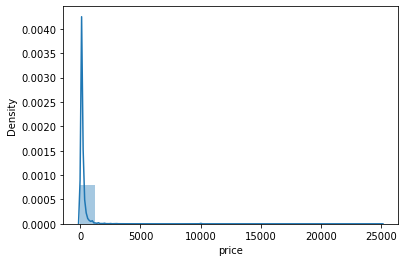

In [23]:
# Let's have a look at price because this is going to be the big issue
sns.distplot(df_bnb['price'],bins=20)

In [75]:
# ok so just as before (no surprise) we have a huge price range.
# I think the first step is to identfy a good bottom and top threshold.
# To that end I'll look at prices below $10 a night, as anything that low feels unreasonable.
# So I'll make a frame that's just listings under 10
df_zeros=df_bnb.query('price<10')

In [76]:
# now we'll take a look at how many we end up with
df_zeros['price'].value_counts()

0    62
1     5
5     3
9     1
Name: price, dtype: int64

In [ ]:
# ok, so 71 listings in total, I think we can do without those, we have 226000 rows to play with
# well, I guess its 227939 rows now haha.

In [70]:
# I ran one of these for 1k(about 1023 values), 1.5(676), 2k(490), 2.5k(365), 3k(246), 4k(142)
# I settled on 3k because I felt like anything over that was going to be too much, and it could really skew the results.
# Too much in terms of cost, they would be outliers. Not too much in terms of lines lost, 3k feels good in that respect
df_grands=df_bnb.query('price>3000')

In [71]:
df_grands['price'].value_counts(ascending=True).sort_index(ascending=True)

3013      1
3018      1
3025      1
3029      2
3040      1
         ..
18000     1
20000     1
21053     1
24600     1
24999    27
Name: price, Length: 246, dtype: int64

In [84]:
#so now we just set up a frame that exists inbetween those and take another look at the chart!
df_bnb_2=df_bnb.query('price>=10 and price<=3000')

C:\Users\evras\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

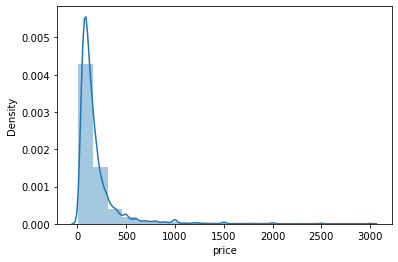

In [85]:
sns.distplot(df_bnb_2['price'],bins=20)

In [77]:
# Much easier to read this one.
# Not surprisingly there is a pretty steep drop off after about $150 a night, than another after 300.
# just as a matter of clean up, I'll get rid of df_zeros and df_grands
del(df_zeros, df_grands)

In [86]:
# Ok, on to the next one. Minimum nights
df_bnb_2['minimum_nights'].describe()

count    225025.000000
mean         10.108988
std          24.879325
min           1.000000
25%           1.000000
50%           2.000000
75%           7.000000
max        1250.000000
Name: minimum_nights, dtype: float64

In [99]:
#ok so, 1 night seems totally reasonable, 1250 is like 3 and half years sooooo Let's go with one year. Much less crazy.
df_night=df_bnb_2.query('minimum_nights>365')

In [100]:
df_night['minimum_nights'].value_counts()

1000    16
500     12
400      5
1125     5
1124     3
999      2
366      2
600      2
950      1
370      1
369      1
750      1
800      1
456      1
1123     1
1250     1
480      1
730      1
395      1
700      1
Name: minimum_nights, dtype: int64

In [127]:
df_bnb_3=df_bnb_2.query('minimum_nights<=365')

In [128]:
df_bnb_3.shape

(224966, 17)

In [129]:
# Oh that came out nicely. so 59 lines of over a year. We can lose those. Let's take a look
df_bnb_3=df_night

C:\Users\evras\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

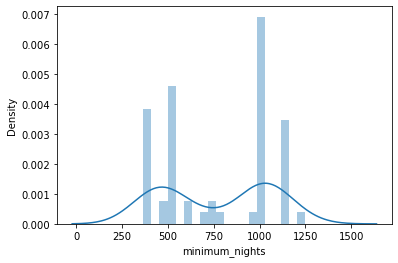

In [130]:
sns.distplot(df_bnb_3['minimum_nights'],bins=20)

In [131]:
# well now that is an interesting distribution...
# Finally let's take a look at host_listing_count!
df_bnb_3['host_listing_count'].describe()

count    59.000000
mean      1.830508
std       1.416072
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       6.000000
Name: host_listing_count, dtype: float64

C:\Users\evras\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_listing_count', ylabel='Density'>

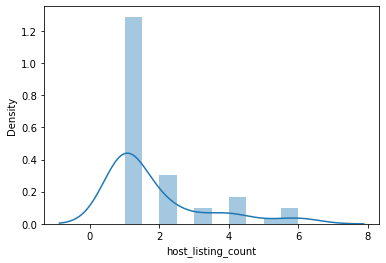

In [132]:
# oh that's pretty stright forward. Let's look at a chart!
sns.distplot(df_bnb_3['host_listing_count'])
#no bins on this one, we aren't looking at enough number for it to be helpful

In [133]:
#I'm going to leave this bit as is. We know according to the describe that the max is 6, and honestly that works here.
# Next phase!

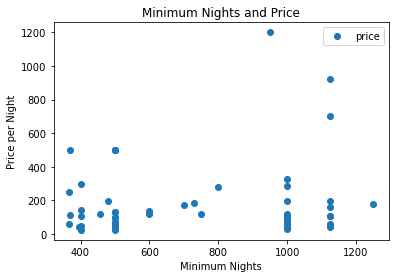

In [144]:
#some scatter plots!
df_bnb_3.plot(x = 'minimum_nights', y='price',style='o')
plt.title('Minimum Nights and Price')  
plt.xlabel('Minimum Nights')  
plt.ylabel('Price per Night')  
plt.show()

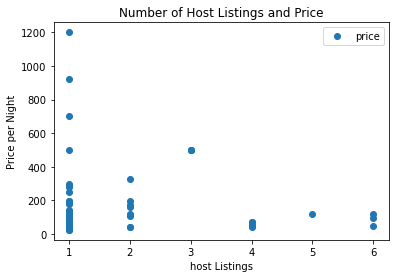

In [145]:
#And another
df_bnb_3.plot(x = 'host_listing_count', y='price',style='o')
plt.title('Number of Host Listings and Price')  
plt.xlabel('host Listings')  
plt.ylabel('Price per Night')  
plt.show()

# The Fancy bits

Ok so I have 3 different variables I want to look at. So we'll end up with 2 different X values and one y(price) as such I'll move forward with X1 being minimum_nights, and X2 will be host_listing_count. However in order to avoid confusion (or a sea of errors) I'll run all the way through everything with X1, and then I'll do it again with X2.

Also I would like to take a moment and point out that _I'm pretty sure there isn't a meaningful corellation here_. From the exploration we did a little while ago, the corrmap showed us that both of these variables have correlation values of .0036 and .043 respectivly with price. Why might I be bothering then you ask? Well one of my hypothesis about this set is that host listings and prices are related on some level. So why not keep disproving it until there is _zero_ doubt!

In [134]:
# assigning the values
X1=df_bnb_3['minimum_nights'].values.reshape(-1,1)
X2=df_bnb_3['host_listing_count'].values.reshape(-1,1)
y=df_bnb_3['price'].values.reshape(-1,1)

## First up, Minimum Nights

In [135]:
#Spliting the test and train up for the minimum nights bit
X1_train, X1_test, y_train, y_test=train_test_split(X1,y,test_size=0.3,random_state=0)

In [136]:
#Setting up the regression object
regression1=LinearRegression()

In [137]:
#now the fit
regression1.fit(X1_train,y_train)

LinearRegression()

In [138]:
#ok so far so good. Now for the test.
y_predicted1=regression1.predict(X1_test)

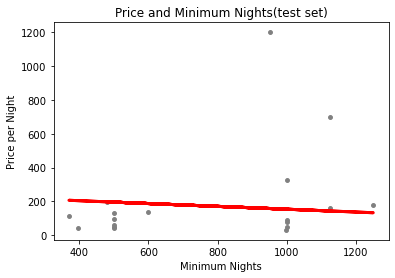

In [139]:
#now for the line heavy plot part!
plot_test1=plt
plot_test1.scatter(X1_test,y_test, color='grey',s=15)
plot_test1.plot(X1_test,y_predicted1,color='red',linewidth=3)
plot_test1.title('Price and Minimum Nights(test set)')
plot_test1.xlabel('Minimum Nights')
plot_test1.ylabel('Price per Night')
plot_test1.show()

In [140]:
#cool beans. looks like theres a negitive relationship, if any.
# Let's do the evaluation parts
rmse_1=mean_squared_error(y_test,y_predicted1)
r2_1=r2_score(y_test,y_predicted1)

In [141]:
#and now to print it all out
print('Slope:',regression1.coef_)
print('Mean Squared Error:',rmse_1)
print('R2 Score',r2_1)

Slope: [[-0.08375279]]
Mean Squared Error: 87670.08977101248
R2 Score -0.07794558688980491


In [142]:
#well I could have told you from the picture, but the model does not look great.
#but as per usual, disproving a hypothesis is as good if not better than proving one.
#next we'll do a quick visual comparison just to do it
data1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predicted1.flatten()})
data1.head(30)

,Actual,Predicted
0,329,153.508561
1,45,195.384957
2,700,143.039462
3,115,206.272819
4,45,204.179000
5,135,187.009677
6,50,195.384957
7,75,153.508561
8,31,153.592314
9,1200,157.696201


## Round two, it's host_listing_count

In [146]:
#Spliting the test and train up for the minimum nights bit
X2_train, X2_test, y_train, y_test=train_test_split(X2,y,test_size=0.3,random_state=0)

In [147]:
#Setting up the regression object
regression2=LinearRegression()

In [148]:
#now the fit
regression2.fit(X2_train,y_train)

LinearRegression()

In [149]:
#next is the test
y_predicted2=regression2.predict(X2_test)

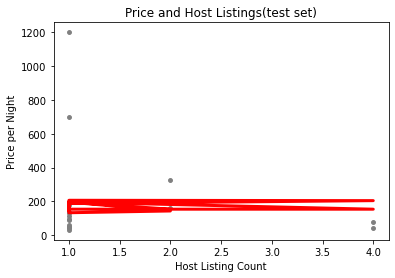

In [154]:
#plot it out
plot_test2=plt
plot_test2.scatter(X2_test,y_test, color='grey',s=15)
plot_test2.plot(X2_test,y_predicted1,color='red',linewidth=3)
plot_test2.title('Price and Host Listings(test set)')
plot_test2.xlabel('Host Listing Count')
plot_test2.ylabel('Price per Night')
plot_test2.show()

In [151]:
# well that's ... wildly different that what I was expecting to see ... I mean, it sure SEEMS negative, but its very zigzaggy
rmse_2=mean_squared_error(y_test,y_predicted2)
r2_2=r2_score(y_test,y_predicted2)

In [152]:
print('Slope:',regression2.coef_)
print('Mean Squared Error:',rmse_2)
print('R2 Score',r2_2)

Slope: [[-9.78125]]
Mean Squared Error: 81270.8006422759
R2 Score 0.0007367264689558395


In [153]:
#another round of poor fitting and predictible correlation
data1=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_predicted2.flatten()})
data1.head(30)

,Actual,Predicted
0,329,172.902439
1,45,182.683689
2,700,182.683689
3,115,182.683689
4,45,153.339939
5,135,182.683689
6,50,182.683689
7,75,153.339939
8,31,182.683689
9,1200,182.683689


# Thoughts

Well, I can't say I'm surprised by the results but I am _please_ by them. They are absolutly consistent with the corrmap I did a few days ago and that is an excellent sign in and of itself. It mean that, without a doubt, there is no correlatin between pricing and either minimum_nights or host_listing_count. I'm still a little surprised by the listing count thing, I honestly was expecting to see that if a host had more listings they would have higher pricing. If only because I would expect the multiple listings to be the result of someone(s) who are strictly in it for the money. And while that might be true, it doesn't seem to be the case in any level of uniformity. Which is intersting.

On the point of the minimum_nights lack of correlation, I would say that I'm only not surprised again because of the corrmap. I did think, going into all this, that minimum_nights might be an indicator of higher prices. In the interest of keeping people who might be less well off out of longer term rentals. Yet here again we have no meaningful correlation, _also intersting_. I think the only thing left to really see is if certain areas tend to generate more of a price increase. I'll be honest though I'm not holding my breath, at the end of the day my money is more on the notion that _events and seasons_ have the biggest impact on pricing. Sadly, I don't have access to that data. Still, we'll see what we find out.